# cluster

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools
from collect import get_twitter, robust_request
import os
num_com = 0
li = []

In [23]:
fr = open("nodes.txt","r")
li = fr.readlines()
li = list(map(str.strip, li))
fr.close()


In [32]:
edges = list(itertools.combinations(li, 2))


In [4]:
############ friends dictionary
twitter = get_twitter()

di = {}
for user in li:
    f = robust_request(twitter, "friends/ids", {"screen_name": user}).json()
    l = sorted(f['ids'])
    di[user] = l


Got error {"errors":[{"message":"Rate limit exceeded","code":88}]} 
sleeping for 15 minutes.
Got error {"errors":[{"message":"Rate limit exceeded","code":88}]} 
sleeping for 15 minutes.
{'CarlaMoulton3': [3365, 803856, 813286, 1131111, 1947301, 2467791, 3744281, 4207961, 4264291, 4390331, 5744772, 5940592, 5944152, 5990782, 6480732, 7334402, 7573442, 7771842, 7931022, 8071902, 8215672, 8287732, 8490292, 8708342, 9116332, 9167712, 9367082, 9890492, 10165452, 11394562, 11572112, 11640472, 11866582, 12231932, 12551072, 12723182, 12995762, 13201312, 13352392, 13493302, 14098909, 14100624, 14235078, 14247236, 14377605, 14400622, 14440521, 14540659, 14548850, 14606079, 14676022, 14703547, 14711138, 14711728, 14731096, 14823499, 14850840, 14947842, 14955908, 14966163, 14993272, 15030319, 15066876, 15067424, 15088481, 15149705, 15195679, 15209424, 15212700, 15248759, 15252090, 15258809, 15263106, 15328895, 15384969, 15441965, 15463671, 15466386, 15467700, 15545122, 15552791, 15554072, 15577657

In [33]:
edges_weight = {}
for edge in edges:
    intersect = len(set(di[edge[0]]) & set(di[edge[1]]))
    union = len(set(di[edge[0]]) | set(di[edge[1]]))
    edges_weight[edge] = intersect/union


In [34]:
ef = open("edges.txt","a")
for edge in edges:
    ef.write(edge[0])
    ef.write("\t")
    ef.write(edge[1])
    ef.write("\n")
ef.close()

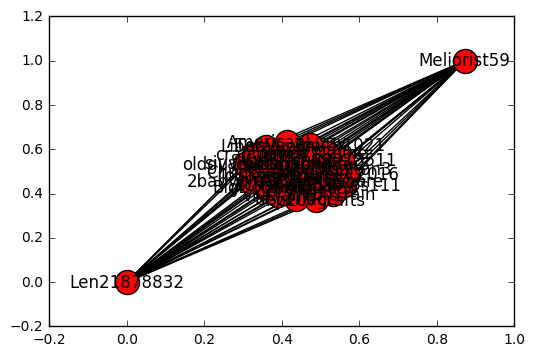

In [35]:
g = nx.Graph()
g = nx.read_edgelist("edges.txt",delimiter = "\t")
nx.draw_networkx(g)
plt.show()

In [43]:
for i in sorted(edges_weight.items(), key=lambda x:x[1]):
    components = [c for c in nx.connected_component_subgraphs(g)]
    if len(components) == 2 :
        break
    else:
        g.remove_edge(i[0][0],i[0][1])
        del edges_weight[(i[0][0],i[0][1])]

num_com = len(components)


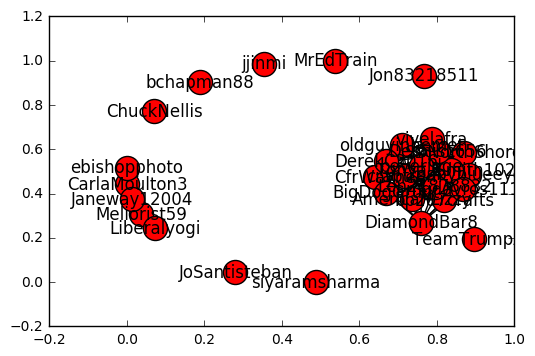

In [44]:
nx.draw_networkx(g)

plt.show()

In [18]:
ow = open("output.txt","a")
ow.write("Number of communities discovered:" + str(num_com))
ow.write("\n")
ow.write("Average number of users per community:" + str(len(li)/num_com))
ow.write("\n")

ow.close()